In [1]:
import pandas as pd

## Reading Excel File 

In [2]:
train_data = pd.read_excel(r'C:\My_work\DataScience\Airticketpriceprediction\1..Flight_Price--__ Machine Learning-20220918T124903Z-001\1..Flight_Price--_ Machine Learning\Data_Train.xlsx')

## Display imported Excel File 

In [3]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


## diplay data types with info function 

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## check for Nulls 

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Data points using shape function 

In [6]:
train_data.shape

(10683, 11)

## print rows of null values 

In [7]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


## Drop a null row using dropana

In [8]:
train_data.dropna(inplace=True)

## Copy data from using copy function 

In [9]:
data = train_data.copy()

In [10]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


## Display data types using Dtypes 

## ML can understand only number 

In [11]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Define function to convert date using pandas 

In [12]:
def convert_into_datetime ( col):
    data[col]=pd.to_datetime(data[col])

## For Loop for chaning three columns 

In [13]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    convert_into_datetime(i)

In [14]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

## to get column names using dataframe.columns

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Get min date from data frame 

In [16]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

## Get max date from data frame

In [17]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

## Extract day month and year from a datetime column 

In [18]:
data['Journey_day']=data['Date_of_Journey'].dt.day

In [19]:
data['Journey_month']=data['Date_of_Journey'].dt.month

In [20]:
data['Journey_year']=data['Date_of_Journey'].dt.year

In [21]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-10-02 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-02 05:50:00,2022-10-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


## Function to extract hour and minute from detature and arrival dates 

In [22]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [23]:
def fn_extract_hour_min(col):
    data[col+'_hour']=data[col].dt.hour 
    data[col+'_minute']=data[col].dt.minute

In [24]:
data.drop('Date_of_Journey',axis=1 , inplace= True)

In [25]:
fn_extract_hour_min('Dep_Time')

In [26]:
fn_extract_hour_min('Arrival_Time')

In [27]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-10-02 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-02 05:50:00,2022-10-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [28]:
def fn_depature_hour_category(x):
    if (x>4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Noon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

In [29]:
data.dtypes

Airline                        object
Source                         object
Destination                    object
Route                          object
Dep_Time               datetime64[ns]
Arrival_Time           datetime64[ns]
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_day                     int64
Journey_month                   int64
Journey_year                    int64
Dep_Time_hour                   int64
Dep_Time_minute                 int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
dtype: object

## barchart and applying function to columns 

<AxesSubplot:>

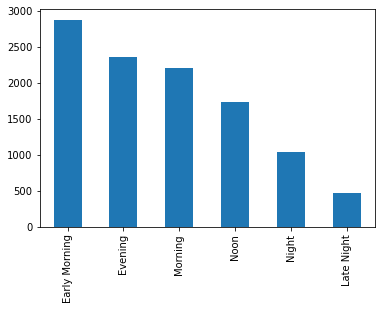

In [30]:
data['Dep_Time_hour'].apply(fn_depature_hour_category).value_counts().plot(kind='bar')

## interactive charts 

In [31]:
!pip install plotly

In [32]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


In [33]:
cf.go_offline()

In [34]:
data['Dep_Time_hour'].apply(fn_depature_hour_category).value_counts().iplot(kind='bar')

In [35]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [36]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [37]:
def fn_preprocessing_Duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [38]:
data['Duration'] =data['Duration'].apply(fn_preprocessing_Duration)

In [39]:
data['Duration_total_min'] =data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','').apply(eval)
    

In [40]:
import seaborn as sns

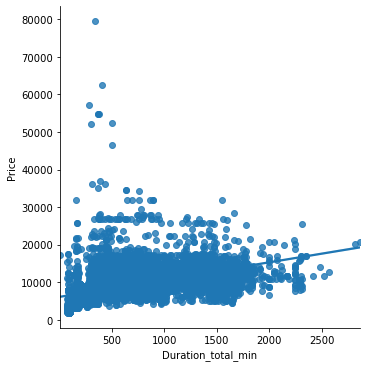

In [41]:
sns.lmplot(x='Duration_total_min',y='Price',data=data)

<AxesSubplot:ylabel='Destination'>

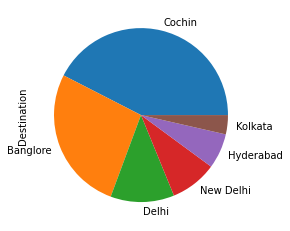

In [42]:
data['Destination'].value_counts().plot(kind='pie')

In [43]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [44]:
data[data['Airline']=="Jet Airways"]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_min
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-02 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-10-02 18:55:00,2022-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-10-02 08:00:00,2022-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-10-02 08:55:00,2022-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,1530
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,2022-10-02 21:10:00,2022-05-10 09:20:00,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,2022-10-02 11:40:00,2022-10-02 19:00:00,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,440
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2022-10-02 23:05:00,2022-06-28 19:00:00,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,1195
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2022-10-02 13:25:00,2022-05-28 04:25:00,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,900
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-10-02 20:35:00,2022-03-13 21:20:00,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,1485


In [45]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

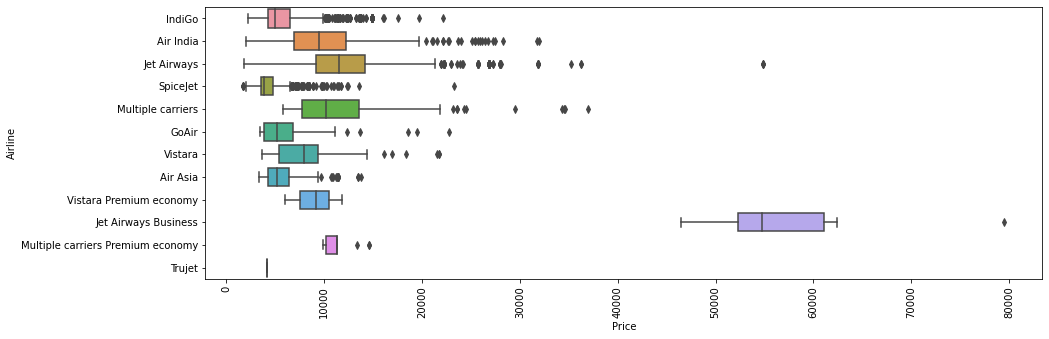

In [53]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


<AxesSubplot:xlabel='Airline', ylabel='Price'>

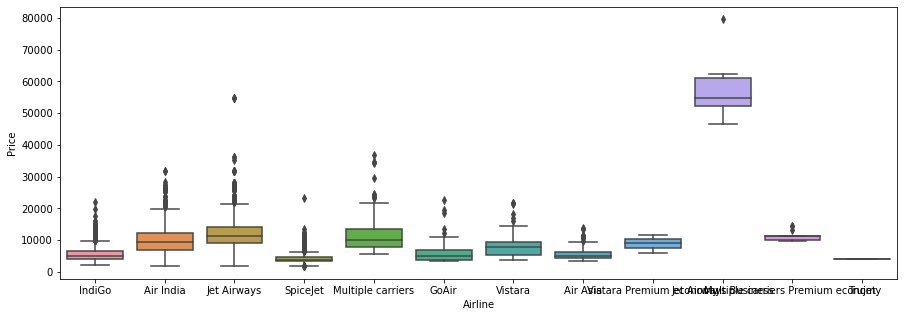

In [56]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=data)

In [1]:
import re
import tarfile
import os
import pandas as pd
## For Progress Bar 
from ipywidgets import IntProgress
from IPython.display import display
import fnmatch
## For Progress Bar 
df = pd.DataFrame(columns=['command','filename','statement','Auditpath','username'])

def add_dataframe(p_action ,p_line,p_user,p_file,p_auditpath):
    df.loc[len(df.index)] = [p_action,p_file, p_line,auditpath,p_user] 
path = r'C:\My_work\Python\Audit_log_oracle\Sep 2022'
# Change the directory
os.chdir(path)

for file in os.listdir():
    if file.endswith(".gz"):
        file_path = f"{path}\{file}"
        print ("Extracting the contents"+file_path)
        tar = tarfile.open( file_path)
        max_count =len(tar.getmembers())
        f = IntProgress(min=0, max=max_count) # instantiate the bar
        display(f) # display the bar
        count = 0
        for member_info in tar.getmembers():
            if count <= max_count:
                f.value += 1 # signal to increment the progress bar
                count += 1
            #print ("- extracting: " + member_info.name)
            tar.extract(member_info)
        tar.close()
print ("### Starting Validations for Folders ###")
for root, dirs, files in os.walk( path, topdown=False):
    for name in dirs:
        auditpath = os.path.join(root, name)
        os.chdir(auditpath)
        max_count =len(fnmatch.filter(os.listdir(auditpath), '*.*'))
        print ("Checking DML and DDL for "+auditpath)
        f = IntProgress(min=0, max=max_count) # instantiate the bar
        display(f) # display the bar
        count = 0
        for file in os.listdir():
                if count <= max_count:
                    f.value += 1 # signal to increment the progress bar
                    count += 1
    # Check whether file is in text format or not
                if file.endswith(".aud"):
                    file_path = f"{auditpath}\{file}"
                    ## print (file_path)
                    # call read text file function
                    ##read_text_file(file_path)
                    file1 = open(file_path, 'r')
                    Lines = file1.readlines()
                    #count = 0
                    # Strips the newline character
                    username =''
                    dmlflag =''
                    action  =''
                    for line in Lines:
                        #count += 1
                        line = line.strip() #or some other preprocessing
                       
                        
                        if ( 'DATABASE USER:' in ''.join(line).upper()):
                            #username = line
                            username =re.findall(r"'(.*?)'", line, re.DOTALL)[0]
                            dmlflag ='Yes'
                        elif ( 'ACTION :' in ''.join(line).upper()):
                            #action= line
                            action = line.split("] '")[1].rstrip(line.split("] '")[1][-1])
                            dmlflag ='No'
                        else:
                            dmlflag ='No'
                        
                        if dmlflag =='Yes' and ( 'alter ' in ''.join(action).lower()):
                            add_dataframe('alter ',action,username,file,auditpath)
                        elif dmlflag =='Yes' and ( 'update ' in ''.join(action).lower()): 
                            add_dataframe('update ',action,username,file,auditpath)
                        elif dmlflag =='Yes' and ( 'grant ' in ''.join(action).lower()):
                            add_dataframe('grant ',action,username,file,auditpath)
                        elif dmlflag =='Yes' and ( 'delete ' in ''.join(action).lower()):
                            add_dataframe('delete ',action,username,file,auditpath)
                        elif dmlflag =='Yes' and ( 'truncate ' in ''.join(action).lower()):
                            add_dataframe('truncate ',action,username,file,auditpath)
                        elif dmlflag =='Yes' and ( 'insert ' in ''.join(action).lower()):
                            add_dataframe('insert ',action,username,file,auditpath)
                        ##df.loc[len(df.index)] = ['Alter',file, line,auditpath,username] 
                        ##elif ( 'update ' in ''.join(line).lower()):
                        ##    df.loc[len(df.index)] = ['update',file, line,auditpath,username] 
                        ##elif ( 'grant ' in ''.join(line).lower()):
                        ##    df.loc[len(df.index)] = ['grant',file, line,auditpath,username] 
                        ##elif ( 'delete ' in ''.join(line).lower()):
                        ##    df.loc[len(df.index)] = ['delete',file, line,auditpath,username] 
                        ##elif ( 'truncate ' in ''.join(line).lower()):
                        ##  df.loc[len(df.index)] = ['truncate',file, line,auditpath,username] 
                        ##elif ( 'insert ' in ''.join(line).lower()):
                        ##    df.loc[len(df.index)] = ['insert',file, line,auditpath,username] 
print ("### End of Validations for Folders ###")
count=max_count
df.head(100)
print('FileCounts')
df['filename'].value_counts()
print('Command Starts')
df['command'].value_counts()
df.to_excel(path+'\output1.xlsx', engine='xlsxwriter')  

Extracting the contentsC:\My_work\Python\Audit_log_oracle\Sep 2022\ERPDB1Audit-Sep22-tar.gz


IntProgress(value=0, max=18544)

Extracting the contentsC:\My_work\Python\Audit_log_oracle\Sep 2022\ERPDB2Audit-Sep22-tar.gz


IntProgress(value=0, max=13281)

### Starting Validations for Folders ###
Checking DML and DDL for C:\My_work\Python\Audit_log_oracle\Sep 2022\ERPDB1Audit-Sep22


IntProgress(value=0, max=18543)

Checking DML and DDL for C:\My_work\Python\Audit_log_oracle\Sep 2022\ERPDB2Audit-Sep22


IntProgress(value=0, max=13280)

### End of Validations for Folders ###
FileCounts
Command Starts


In [3]:
df['filename'].value_counts()

PRODERP1_ora_35395_1.aud    757
PRODERP2_ora_54735_d.aud     80
PRODERP1_ora_47743_1.aud     76
PRODERP1_ora_13259_1.aud     39
PRODERP1_ora_56871_2.aud     36
                           ... 
PRODERP1_ora_27748_3.aud      1
PRODERP1_ora_27449_2.aud      1
PRODERP1_ora_27401_1.aud      1
PRODERP1_ora_27379_2.aud      1
PRODERP1_ora_34815_2.aud      1
Name: filename, Length: 432, dtype: int64